# **SCIENTIFIC ARTICLES CLASSIFIER**



# **1. INTRODUCTION AND OBJECTIVES**

The project consists of applying knowledge of "topic modeling" and making a binary classifier that is able to distinguish between texts that deal with the topic of "COVID-19" and texts that do not deal with that topic. For this purpose, a previously provided "dataset" of textual documents will be used.

This "dataset" consists of 26078 entries with the following columns:

1. pubmed_id: Article identifier in the PubMed database.
2. title: Title of the article.
3. abstract: Summary of the article. 
4. journal: Magazine in which it has been published.
5. year: Year of publication. 
6. is_cord19: binary tag (0 or 1) identifying whether the article is related to COVID-19.







## Libraries

In [ ]:
#******************************************* LIBRARIES TO USE ************************************

# Pandas
import pandas as pd

# Numpy
import numpy as np    
import math

# To perform the TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

# To paint the confusion matrix of each classification method and to take the best hit rate result
from sklearn.metrics import confusion_matrix, accuracy_score

# Itertools
import itertools

# To separate the dataset into training data and test data
from sklearn.model_selection import train_test_split

import nltk
# Using the command pip install nltk in the anaconda terminal we proceed to the download of nltk 
# If we do not, uncomment the next line we proceed to the download of nltk also 
# nltk.download()

import gensim
# The command pip install gensim in the anaconda terminal is used to download gensim
# which is needed for vectorization; that is to generate a token dictionary
# And it is also used for the LDA text sorter

# Import the word_tokenize function and the download function from the nltk library.
from nltk import download, word_tokenize

# In order to perform the tokenization, the punkt package must be downloaded.
download('punkt')

# The WordNetLemmatizer function is imported from the nltk.stem library.
from nltk.stem import WordNetLemmatizer

# In order to perform the lematization, the download of the wordnet package is required. 
download('wordnet')

# The stopwords function is imported from the nltk.corpus library.
from nltk.corpus import stopwords

# For the performance of the cleanner it is required to download the stopwords package.
download('stopwords')

# Matplotlib
# To be able to paint represent in a graphic
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# To make the LDA classifier
from gensim.models import LdaModel

# To see the consistency of the LDA model
from gensim.models import CoherenceModel

# To use the "pyLDAvis" library.
!pip install pyLDAvis


## Import file ". csv" and Implemented Functions

In [ ]:
# By ! gdown we proceed to download the file '.csv' that is in that address, with which we will work. 
# And that file is saved in the 'Files' section of 'google colab'.
!gdown https://drive.google.com/u/0/uc?id=1dZMc8_JCFYteYL8vch90CRMS2kKMGCik

 
# The "preprocesado" function performs the preprocessing of texts, as well as generating the BoW corpus and dictionary
def preprocesado(texto):

    # TOKENIZATION
    corpus_tokens = []
    
    for n, art in enumerate (texto):        
        tokens = word_tokenize(art)
        corpus_tokens.append(tokens)
    print ("Tokenization made...")
    
    # HOMOGENIZATION    
    corpus_filtered = []
    
    for n, token_list in enumerate (corpus_tokens):  
        filtered_tokens=[token.lower() for token in token_list if token.isalnum()]
        corpus_filtered.append(filtered_tokens)        
    print ("Homogenization made...")   
    
    # LEMATIZATION      
    wnl = WordNetLemmatizer()    
    corpus_lemmatized = []
    
    for n, token_list in enumerate(corpus_filtered):     
        lemmat_tokens=[wnl.lemmatize(token) for token in token_list]
        corpus_lemmatized.append(lemmat_tokens) 
        
    print ("Lematization made...")    

    # CLEANER    
    stopwords_en = stopwords.words('english')
    newStopWords = ['wa', 'ha', 'they', 'his', 'he', 'their', 'at', 'who', 'been', 'may', 'can', 'more', 'were', 
    'other', 'these', 'than', 'but', 'some', 'there', 'when', 'many', 'this','be','not','have', 'all', 'no', 'which', 'one', 
    'such','had','what','her','how','are','or','also','use','used','into','first','most','between','about','new','often','only',
    'after','way','through','being','would','them','two','while','abstract','ma','p']  
    stopwords_en.extend(newStopWords) 
    
    corpus_clean = []    
    for n, token_list in enumerate (corpus_lemmatized):        
        clean_tokens = [token for token in token_list if token not in stopwords_en]
        corpus_clean.append(clean_tokens)
    print ("Clean made...")     
   
    # VECTORIZATION
    dictionary = gensim.corpora.Dictionary(corpus_clean)    
    corpus_bow = [dictionary.doc2bow(doc) for doc in corpus_clean]   


    # This function returns the Bow corpus, dictionary and corpus clean.  
    return corpus_bow , dictionary, corpus_clean

# The "preprocesado_texto" function performs the preprocessing of articles, generating a BoW corpus
# using the dictionary that has been generated previously.
def preprocesado_texto(texto,dictionary):
    
    # TOKENIZATION    
    corpus_tokens = []        
    for n, art in enumerate (texto):        
        tokens = word_tokenize(art)
        corpus_tokens.append(tokens)
    print ("Tokenization made...")
    
    # HOMOGENIZATION    
    corpus_filtered = []
    
    for n, token_list in enumerate (corpus_tokens):  
        filtered_tokens=[token.lower() for token in token_list if token.isalnum()]
        corpus_filtered.append(filtered_tokens)
        
    print ("Homogenization made...")   
        
    # LEMATIZATION      
    wnl = WordNetLemmatizer()
    
    corpus_lemmatized = []
    
    for n, token_list in enumerate(corpus_filtered):     
        lemmat_tokens=[wnl.lemmatize(token) for token in token_list]
        corpus_lemmatized.append(lemmat_tokens) 
        
    print ("Lematization made...") 

    # CLEANER     
    stopwords_en = stopwords.words('english')
    newStopWords = ['wa', 'ha', 'they', 'his', 'he', 'their', 'at', 'who', 'been', 'may', 'can', 'more', 'were', 
    'other', 'these', 'than', 'but', 'some', 'there', 'when', 'many', 'this','be','not','have', 'all', 'no', 'which', 'one', 
    'such','had','what','her','how','are','or','also','use','used','into','first','most','between','about','new','often','only',
    'after','way','through','being','would','them','two','while','abstract','ma','p']    
    stopwords_en.extend(newStopWords) 
    corpus_clean = []
    
    for n, doc in enumerate (corpus_lemmatized):        
        clean_tokens = [token for token in doc if token not in stopwords_en]
        corpus_clean.append(clean_tokens)        
    
    # VECTORIZATION
    corpus_bow = [dictionary.doc2bow(doc) for doc in corpus_clean]   

    # This function returns the final corpus Bow 
    return corpus_bow

# **2. BASIC PROJECT**

The objectives of the Basic Project are: to analyze the topic of the data collection provided and to develop a "binary" classifier, which allows to determine whether or not an article is relevant for research on "COVID-19".

> This section shall describe the pre-classification process:
*   Loading the data set "dataset". 
*   The implementation of a pipeline for the preprocessing of different texts. 
*   The extraction of themes and vector representation of documents implementing the "LDA" algorithm. 
*   The calculation of semantic distances between documents.
*   The calculation and representation of a graph. 

> Also the classification, for which the data have been separated into two sets: one of training and one of test, for thus, with the training set, adjust the classifier to later see the performance that is achieved through the test labels that are provided to us in the data set of the "dataset". 
The following shall be used to assess the performance of the classifier:
*   The "TF-IDF" representation.
*   The document vectors provided by "LDA".
*   Or both. 

## **2.1. Loading the data set "dataset"***

For loading into the system, the data set "dataset" of the file ". csv" provided in the project, the "pandas" library has been used, using the "pd.read_csv" function.

> In order to have more information, when analyzing the texts, both the abstract and the title of each of the "dataset" texts have been saved together.

> A total of 26078 texts will be uploaded. 

In [ ]:
# Load the data, importing the text from the files. csv
datos = pd.read_csv("20201215_PrFinal.csv",error_bad_lines=False, engine="python")

# Both the abstract and the title of each text of the "dataset" are saved in datos['titleabstract']
datos['titleabstract'] = datos['title'] + " " + datos['abstract']

## **2.2. Text preprocessing**

Once the title and summary of each article have been put together, the different texts are pre-processed.

> The preprocessing of articles consists of making a series of transformations on the flat text of each article, to obtain a clearer representation. This allows working with topical models such as "LDA" and other types of text processing tools.

> This project has carried out the following preprocessing of articles:
1.   **Tokenization:** It consists of dividing the text into words, that is, separating the text into "tokens" (in the different words that compose it).
To carry out, the "tokenization" has used the function "word_tokenize" of the module "NLTK".
2.   **Homogenization:** It consists of removing spaces, punctuation marks and non-alphanumeric characters, which are not relevant for analyzing the semantic content of the article. In addition to putting all tokens in lowercase.
3. **Cleaning:** It consists of removing those words from the text that have no meaning, that is to say that they do not provide information, for example: articles, pronouns, prepositions, etc. To remove them, the "stopwords_en" function of the "NLTK" module has been used.
4. **Lemmatization:** It consists of removing the bent part of the words and leaving the root form, without lexemes or morphemes. The "WordNetLemmatizer" function in the "NLTK" module returns each word of the documents reduced to a root.
5. **Vectorization:** It consists of creating a dictionary with the words resulting from the previous processes. This dictionary will be used during the classification. 

In the section **Import file ". csv" and Implemented Functions** are defined two functions that will be used throughout the notebook.

*   **preprocesado** --> This function is responsible for the preprocessing of texts and vectorization, generating the "corpus BoW" and the "dictionary" that corresponds to it.
*   **preprocesado_texto** --> This function is very similar to the previous one, performs the preprocessing and generates a "corpus Bow" from a "dictionary" that is entered by parameter.

The function shall be used in this section **"preprocesado"**.

In [ ]:
# The preprocessing steps are performed and the "corpus bow" and the corresponding "dictionary" are returned.
corpus_BoW, dictionary_BoW, datos['corpus_clean']  = preprocesado(datos['titleabstract'])

Tokenizacion Realizada...
Homogenizacion Realizada...
Lematizacion Realizada...
Clean Realizada...


To check that the processing has been done correctly, the ratio of the distribution of "tokens" and the average number of appearances per article is observed.

> In the following figure, the numerical matrix is represented with the number of times each "token" word appears in the dictionary.

> The 25 most repeated words are shown. It can be seen that words related to the theme "COVID-19" appear; therefore, it is verified that words that do not influence the classification have been deleted.

Text(0.5, 1.0, 'La distribución de Tokens')

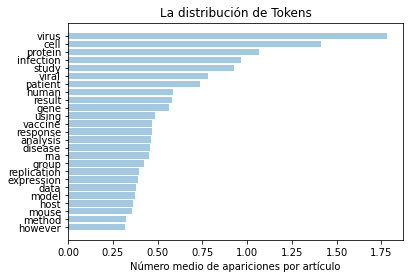

In [ ]:
# The distribution of most used words/tokens throughout the dictionary is represented
n_tokens = len(dictionary_BoW)
corpus_bow_flat = [item for sublist in corpus_BoW for item in sublist]
token_count = np.zeros (n_tokens)
for x in corpus_bow_flat:
   token_count[x[0]] += x[1]
    
ids_sorted = np.argsort(-token_count)
tf_sorted = token_count[ids_sorted]
    
n_art = len(datos['titleabstract'])
n_bins = 25
hot_tokens = [dictionary_BoW[i] for i in ids_sorted[n_bins-1::-1]]
y_pos = np.arange(len(hot_tokens))
z = tf_sorted[n_bins-1::-1]/n_art
plt.figure()
plt.barh(y_pos, z, align='center', alpha = 0.4)
plt.yticks(y_pos, hot_tokens)
plt.xlabel('Average number of appearances per article')
plt.title('The distribution of tokens') 

## **2.3. Topic Modeling "LDA"**

Topic Modeling is an analysis that allows viewing relationships in a collection of documents. Some of them are a preliminary step to the classification of texts. To perform Topic Modeling, it is necessary to study the number of topics that appear in the document collection.

> In this case the Topic Modeling "LDA" (Latent Dirichlet Allocation) has been implemented to find precise sets of topics within a group of documents.

> It is a "generative" Topic Model, assuming that each word in a document is generated from a topic that is taken from a topic distribution for each document. This distribution is generated from a "Dirichlet" distribution, meaning that "LDA" allows a document to be part of several topics each one with a different weight.

> "LDA" is another transformation over the "corpus BoW". This transformation returns a space of smaller dimension than the one previously obtained. It is assumed that each document is a set of several topics and that each document will have a percentage of belonging to each topic.

> Topics are probability distributions on words. It is a small category formed by the most representative words of that topic.

> To implement a good "LDA" model, you must find the optimal number of topics that represent the total set of documents. Therefore, it will be analyzed for which number of topics the best performance is obtained.

> To check the number of topics with which the best performances are obtained, a loop with different topical values has been generated (from 1 to 36 with steps of 3) and through the function "*LdaModel(corpus_bow,num_topics,id2word)*" Topic Modeling has been generated.

> To check the performance and evaluate the Topic Modeling, the "*coherenceModel*" function of the "*gensim*" bookshop is used.

> In the following graph, you can see the different values of "coherence", of each of the constructed "LDA" models, that are obtained according to the "number of topics" that are used, to be able to choose the number of topics that provides better "coherence".



Text(0, 0.5, 'Coherencia')

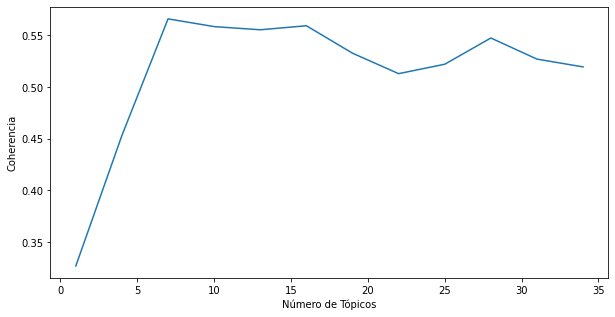

In [ ]:
coherence = []
for nb_topics in range(1,36,3):
    lda = LdaModel(corpus_BoW, num_topics = nb_topics, id2word = dictionary_BoW, passes=10,random_state=123)
    cohm = CoherenceModel(model=lda, texts=datos['corpus_clean'], dictionary=dictionary_BoW, coherence='c_v')
    coh = cohm.get_coherence()
    coherence.append(coh)

# The coherence is displayed for each number of topics used.
plt.figure(figsize=(10,5))
plt.plot(range(1,36,3),coherence)
plt.xlabel("Number of Topics") 
plt.ylabel("Coherence")

As can be seen in the chart above, the model acquires a greater coherence when its number of topics is 7, obtaining a coherence superior to 0.55.

> Therefore, from this moment, the "LDA" model will be built for the set of articles with a quantity of 7 topics.



In [ ]:
num_topics=0
max_coherence=0
for n in range(0,len(range(1,36,3))):
  if (coherence[n]>max_coherence):
    max_coherence = coherence[n]
    num_topics = n*3+1
print("Number of topics with greater coherence value = ", num_topics)
print("With a coherence of = ", max_coherence)

Numero de tópicos con mayor valor de coherencia =  7
Con una coherencia de =  0.5657424601928811


Then, the distribution of words for each topic is visualized, both graphically and numerically.

In [ ]:
k = num_topics
lda = LdaModel(corpus_BoW, num_topics = num_topics, id2word = dictionary_BoW, passes=10, random_state=123)

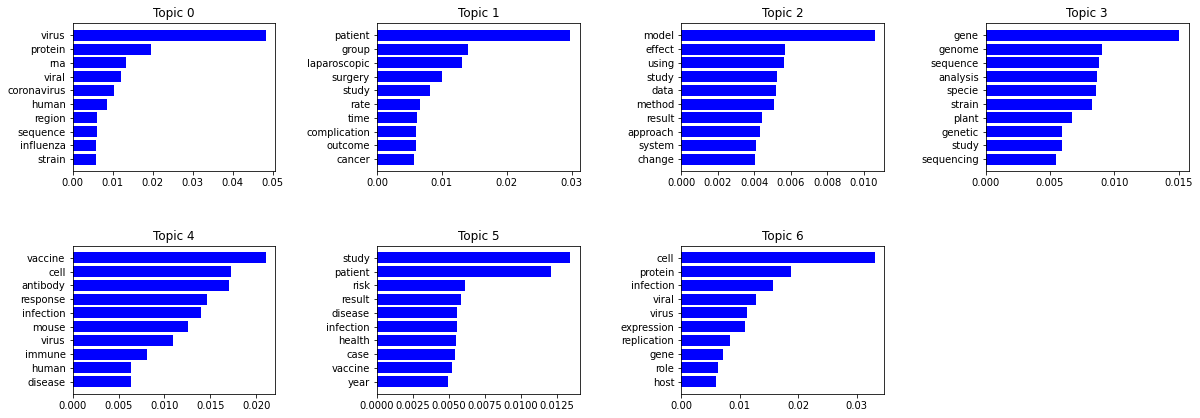

In [ ]:
def plot_top_words(lda=lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
        
plot_top_words()

For a better visualization of the topics, the library "*pyLDAvis*" is used.

> At the end of the next cell, you see the representation of the topics, where 7 circles are observed in the left part, corresponding to each of the topics and to the right the 30 most representative words of each of them.

> Each circle is a different "topic", with the understanding that the larger the size, the more abundant the topic. Furthermore, the more widely spaced the circles are and the larger the circles are, the better the model.


In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

lda_display = pyLDAvis.gensim.prepare(lda, corpus_BoW, dictionary_BoW, sort_topics=False)
pyLDAvis.display(lda_display)

In addition to visualization, Topic Models are useful for obtaining a semantic representation of documents that can then be used for some other purpose:
*   In problems of document classification.
*   In content-based recommendation systems.

The purpose is for the Topic Model to provide a (semantic) vector representation  of documents and to use probability divergences to measure the similarity of documents.

The following functions of the "LdaModel" class are useful in this context:
*   "**get_topic_terms (topic_id)**": Get the vector of the probability distribution between words for the indicated tropic.
*   "**get_document_topics (bow_vector)**": It obtains a (scattered) vector with the probability distribution between the topics for the document provided.

> In this work it is interesting to calculate the "document matrix" that returns the algorithm "LDA" (Ndocs X Ntopics); therefore the function "get_document_topics" will be used. An alternative to using this function is to directly transform a data set using the "lda" object, a procedure that has been implemented in the manner shown below to achieve what is known as "reduced_corpus".



In [ ]:
reduced_corpus = [el for el in lda[corpus_BoW]]

Finally, the "Gensim" library provides some useful functions to convert between formats and to simplify interaction with "numpy" and "scipy".

> The following code fragment converts the previously obtained "reduced_corpus" into the "document matrix" with which you want to work in the next section for the calculation of semantic distances.



In [ ]:
matrizLDA = gensim.matutils.corpus2dense(reduced_corpus, num_topics).T
#print(matrizLDA)
print(matrizLDA.shape)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


(26078, 7)


## **2.4. Calculation of semantic distances between documents, and calculation and representation of a graph**

There are many similarity measures. A simple calculation is the similarity of "**Hellinger**", given by the following formula:
> **sim(p,q) = sqrt(p)*sqrt(q)T**,

> where p and q will be the topical vectors corresponding to the documents, and sqrt(p) represents the square root, component by component, of the vector p.

> To calculate all similarities between pairs of block documents, if X is the document matrix returned by the "LDA" algorithm (Ndocs X Ntopics), the similarity matrix shall be calculated:

> **S = sqrt(X)*sqrt(X)T**, which will be a square matrix.

In [ ]:
A = np.sqrt(np.abs(matrizLDA))
B = np.sqrt(np.abs(matrizLDA)).T

S = np.matmul(A, B)

#print("product of A and B:\n", S)

print("shape of product =", S.shape)

shape of product = (26078, 26078)


Once the matrix of similarities "S" has been generated, to calculate the graph the nodes of this will be the documents and the link between two nodes will be the measure of similarity between two documents.

To generate the graph in "Gephi" can be done in two ways:
*   Generating two ". csv" files. In one of the files two columns are stored: the id and the tag of the nodes; and in the other, 3 columns are stored: Source, Target and the weight of the relation. The ". csv" with nodes is imported into "Gephi" as "Node Table" and ". csv" with Source, Target and weight is imported as "Edge Table" in the same project.
*  Generating a ". graphml" file with all the similarity measures and node id.

In this work the last option was finally chosen to generate the graph in "Gephi". For this, the following functions were used from the Python "networkx" library:
*   "nx.from_numpy_array" --> To get a graph of the NumPy matrix.
*   "nx.get_edge_attributes" --> To obtain edge attributes from the Chart, in this case you want to obtain the "weights". 
*   "nx.write_graphml"--> To write the chart "G" obtained in "GraphML" format on the path. 


In addition, to construct the graph, 10% of the documents were selected (if there are 26078 documents in total, 10% is 2607.8 which was rounded to 2608 documents); therefore, by means of the function "np.delete" the matrix S is reduced to size 2608 x 2608. Also, the graph is constructed by generating a link between each pair of documents whose similarity is non-zero. To avoid an overly dense graph, only the similarities above a threshold were selected. The threshold chosen was to keep those weights that are greater than 0.8. With this threshold a graph of 2608 nodes and 367397 edges was generated, which is not too dense but sufficiently connected.



In [ ]:
import networkx as nx
Snew = np.delete(S, range(2608,26078), axis =1)
Snew2 = np.delete(Snew, range(2608,26078), axis =0)
G = nx.from_numpy_array(Snew2)


#We remove edges with the weight we want
edge_weights = nx.get_edge_attributes(G,'weight')
G.remove_edges_from((e for e, w in edge_weights.items() if w < 0.8))
nx.write_graphml(G,'Grafo.graphml')

After generating the file ". graphml", in order to work and analyze said graph, the tool "Gephi" will be used.

> To adapt the chart to a distribution that allows future communities to be observed in a more structured way, a distribution algorithm called "Force Atlas 2" was applied, this time because the network was large, the scale was adjusted to a value equal to 50, thus obtaining greater repulsion and a more dispersed graph.

> "Force Atlas 2" is based on the property that 2 nodes that have a link to each other tend to attract each other and, on the contrary, 2 nodes that are not intertwined tend to repel each other. Therefore, nodes that are linked to each other tend to group together, and unbound nodes tend to separate. This will make it possible to detect communities, since the nodes are separated into zones and therefore the nodes that belong to the same zone essentially belong to the same community, since they are close to each other.

> The objective of this experiment is to analyze the possible communities, in this case dealing with the topic "COVID-19" or not; so partitions have been developed by calculating modularity as a measure of quality.

> Modularity: It allows to measure the force of division of a network in "clusters", that is to say in subnets (communities), which have a common theme. Obtaining a high modularity value indicates that it is a sophisticated internal structure.

> In the "Statistics" section of Gephi, modularity is executed (with a resolution equal to 0.8) and then applied as an attribute for the partition of nodes, which allows setting a color code to differentiate communities.

> On the other hand, the size of the nodes allows reflecting other metrics. In this case, among different measures of centrality such as "degree", "closeness" or "betweenness", which have been calculated in the "Statistics" section of "Gephi", "betweenness" has been used as a node ranking attribute.

> This way the network has already been implemented and the result will be displayed in the next image.

> Note that in the chart, the size of the labels is given by the "betweenness" ranking, showing the centrality within each community.

> If you look at the two communities, you can see that of each there are different groups, and that in each group there is a central node. It was found that this central node actually belonged to the assigned community.


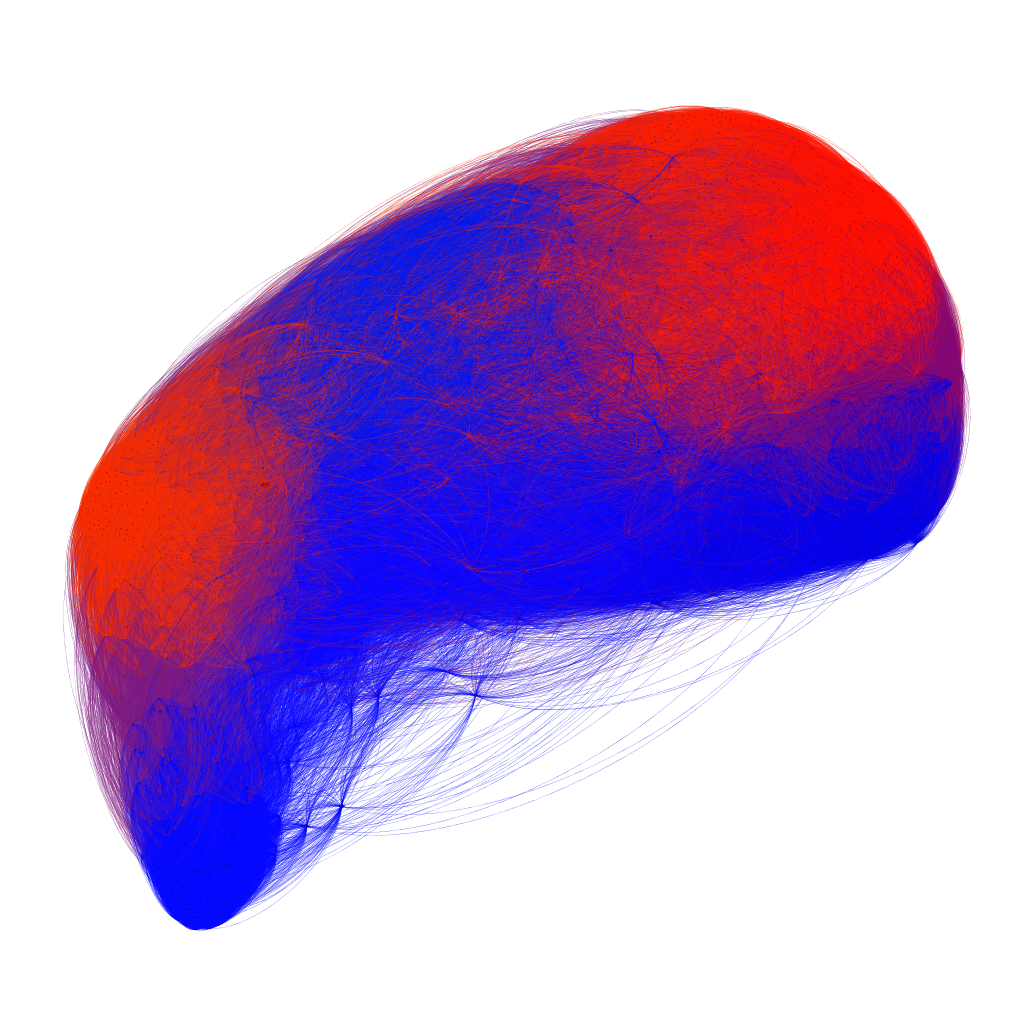

In one of the community groups that does not deal with the theme "COVID-19", identified with blue, its central nodes are "790" and "1185".

By researching the "dataset" it can be confirmed that it does not deal with the topic "COVID-19":

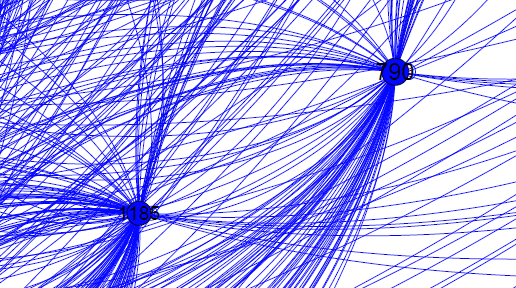


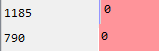

In another community group that does not deal with the topic "COVID-19", its central node is "313" and you can also check that it does not deal with this topic.

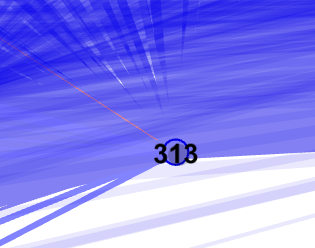

313 Tabla.png

In one of the community groups that does deal with the theme "COVID-19", its central node is the "2126". 

By researching the "dataset" it can be confirmed that it does indeed deal with the topic "COVID-19":

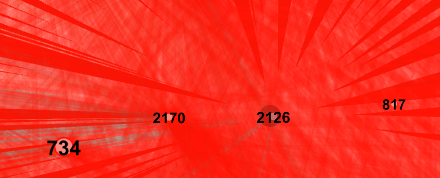

2126 Tabla.png

In another community group dealing with the theme "COVID-19", its central nodes are "413" and "499". 

Researching in the "dataset" you can confirm that they deal with the topic "COVID-19":

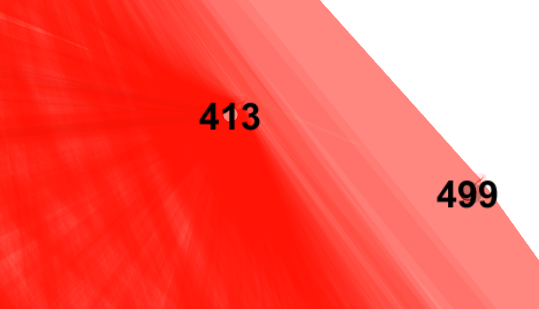

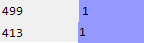

But there are some nodes that, although included in one community, get links from the other and depending on the proportion of links received, it will belong to one community or the other.


For example, the node "614" itself is included in the blue community, meaning that it does not deal with the topic "COVID-19", but it can be seen that this node gets links in blue but also several links in red (which deals with the topic "COVID-19"). 

If you check the "dataset", you can see how it actually deals with the "COVID-19" theme.

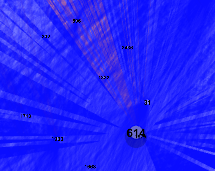

614 Tabla.png

Another case is the node "1044". In itself it is included in the red community, that is to say it deals with the topic of "COVID-19", but you can see that this node gets links in red but also several links in blue.

If you check the "dataset", you can see how it does not actually address the "COVID-19" theme.


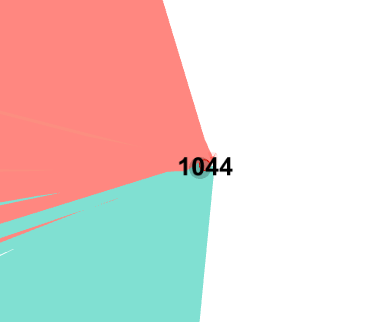

1044 Tabla.png

But for example, in the node "2047" itself belongs to the red community, it deals with the topic "COVID-19", and it gets both red and blue links. 

If it is verified in the "dataset" it is evident that in this case it does deal with the topic "COVID-19" since although some blue links arrive, the red ones predominate.

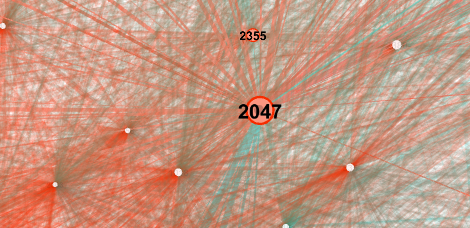

2047 Tabla.png

Or, in the node "888", included in the blue community (it does not deal with the theme "COVID-19"), you get in addition to blue links, also red links.

If you check the "dataset" it is evident that it does not deal with this topic, because blue links predominate.

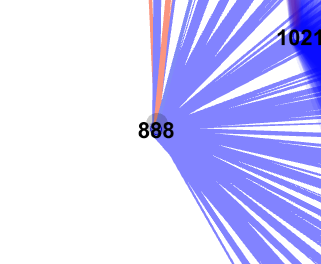

888 Tabla.png

Therefore, it can be concluded that the Graph gives us guidance on the classification of documents into two communities: blue (it does not deal with the topic "COVID-19") and red (it does deal with it). 

However, in order to determine whether the classification is done correctly, the procedures set out in paragraph 2.5 are carried out.

## **2.5. Classification**

### **Input TF-IDF**

To perform the classification, the data have been separated into two sets: a training and a test. In this way with the training set, the classifier will be adjusted to later be able to see the performance that is achieved with the test labels, which are provided in the "dataset".

> Once the training data has been separated from the test data, the first step is to calculate the training "corpus bow" and the corresponding dictionary. To do this, the function implemented in the **Import file ". csv" and Implemented Functions** section is used, which is called "**procesado_definiciones**".

> After this, the test "corpus bow" is calculated using the test data and the previously generated dictionary. In this case, the function "**procesado_texto**" also defined in the section named above is used.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(datos['titleabstract'], datos['is_cord19'], test_size=0.5, random_state=42)
corpus_bow_train, dictionary_bow_class, _ = preprocesado(X_train)
corpus_bow_test = preprocesado_texto(X_test, dictionary_bow_class)

Tokenizacion Realizada...
Homogenizacion Realizada...
Lematizacion Realizada...
Clean Realizada...
Tokenizacion Realizada...
Homogenizacion Realizada...
Lematizacion Realizada...


From this moment on, the "corpus BoW" becomes both training and testing in the dense matrix, in order to later make a transform "TF-IDF", expressing the relavance of each of the relevant words in the documents of the collection.

> At the end of the classification section, the document vectors provided by "LDA" will also be implemented as input.

In [ ]:
X_train = gensim.matutils.corpus2dense(corpus_bow_train, len(dictionary_bow_class)).T
X_test = gensim.matutils.corpus2dense(corpus_bow_test, len(dictionary_bow_class)).T

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [ ]:
transformer=TfidfTransformer()
transformer.fit(X_train)
X_train = transformer.transform(X_train)

In [ ]:
transformer=TfidfTransformer()
transformer.fit(X_test)
X_test = transformer.transform(X_test)

After performing the "TF-IDF" transformation, and doing several tests with other classifiers, it is decided to use the "*SVC support vector classifier"*, with the parameters: *SVC(C=1, gamma=0.001, degree=1, kernel = 'linear')*. 

> To determine the parameters for the "SVC" classifier, use has been made of "cross validation" using the function "*GridSearchCV()"*.

> "*GridSearchCV()"* is a class available in "scikit-learn" that allows to systematically evaluate and select the parameters of a model. To do this, the model you want to implement, the parameters to test (a range of values) and the cross-validation division strategy is determined.




In [ ]:
from sklearn.svm import SVC
clf = SVC(C=1, gamma=0.001, degree=1, kernel = 'linear', probability=True)

In [ ]:
clf.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.001, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Finally, the labels are predicted on the test data and compared with the real values, obtaining an error rate around 16%.

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc_tfidf = accuracy_score(y_predict, y_test)
error_tfidf = 1 - acc_tfidf

print("The classification error with input TF-IDF is: ", error_tfidf)

El error de clasificación con entrada TF-IDF es:  0.15875450571362837


On the other hand, the performance of the classifier is visualized by the ROC curve using the plot_roc_curve() function of the sklearn library, this graph relates the sensitivity of our model with optimistic failures, that is, classify the negatives as positive. In this case, the curve makes sense because due to the performance of the classifier and that there are approximately twice as many articles that speak of covid, that is, the double positive articles as negative.

In this section we proceed to paint the ROC curve since the evaluation metric to measure the performance of the classifier is "AUC" "Area Under the curve", which is based on the probability of false alarm and the probability of detection.

* Probability of detection "TPR" is the ratio of positives correctly considered positive, to all positives.

* Probability of false alarm "FPR" is the proportion of negatives erroneously considered as positive, with respect to all negatives.

> To perform this rating of the classifier, the probabilities of whether or not each document deals with the topic "COVID-19" are obtained. 



In [ ]:
# The probabilities are predicted.
lr_probs = clf.predict_proba(X_test)

# Probabilities are saved for the positive result only.
probab = lr_probs[:, 1]

Using the Python function "roc_curve" you pass the test labels and probabilities, getting the values "TPR" and "FPR".

> Once the aforementioned values have been obtained, using the Python function "auc" the values "fpr" and "tpr" are passed to it and the value of the "Area under the curve", "roc_auc" is obtained.

> The value obtained from "AUC" is equal to 0,90. This value indicates a performance of the high classifier.

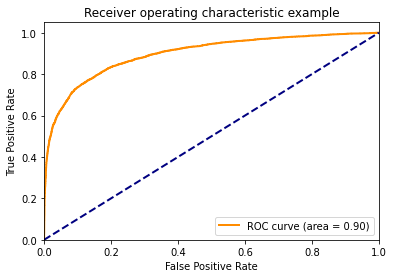

In [ ]:
# To paint the ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Calculate the ROC curve and the ROC area for each class.
fpr = dict()
tpr = dict()
roc_auc = dict()
# There are two classes since it is a binary classification problem.
n_classes = 2

# Calculate the True Positive Rate and the False Positive Rate.
fpr, tpr, _ = roc_curve(y_test, probab)
# Calculate the value of the "Area under the curve"
roc_auc = auc(fpr, tpr)

# The ROC curve is drawn.
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Another procedure used to measure the performance of the classifier is the representation of the **confusion matrix**.

> When a binary prediction is made, there can be 4 types of results:

* Predict 0 while the real class is actually 0: "True Negative". 
* Predict 0 while the real class is actually 1: "False Negative". 
* Predict 1 while the real class is actually 0: "False Positive".
* Predict 1 while the real class is actually 1: "True Positive".

> To obtain the matrix of confusion, we review all the predictions made with the model and count how many times each of these 4 types of results occurs.

> To paint the confusion matrix a function called "plot_confusion_matrix" has been defined, based on the link function cited in the references.

> In this case, among the 13039 data you have classified, 10969 are correctly classified and 2070 are poorly classified.

Confusion matrix, without normalization
[[7970  552]
 [1518 2999]]


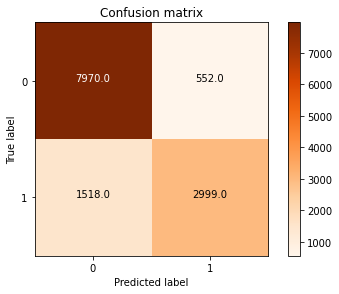

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks()).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=1) 
print('Confusion matrix, without normalization')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

### **Input LDA**

As mentioned above, performance is evidenced when LDA input is used instead of TF-IDF.

> Once you have an LDA matrix and a dense matrix, done previously, you separate the data into 2 sets: a train set and a test set.

> In order to be able to make a comparison, the same carrier vector classifier has been used, being able to examine the accuracy when the tf-idf transform is used as input against an input with LDA.

In [ ]:
# This cell is uncomment according to the instructions in the user manual
"""
lda = LdaModel(corpus_BoW, num_topics = 7, id2word = dictionary_BoW, passes=10, random_state=123)
reduced_corpus = [el for el in lda[corpus_BoW]]
matrizLDA = gensim.matutils.corpus2dense(reduced_corpus, 7).T
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(matrizLDA, datos['is_cord19'], test_size=0.5, random_state=42)

In [ ]:
clf = SVC(C=1, gamma=0.001, degree=1, kernel = 'linear', probability=True)

In [ ]:
clf.fit(X_train,y_train)

Finally, the labels are predicted on the test data and compared with the real values, obtaining an error rate around 31%. 

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
acc_lda = accuracy_score(y_predict, y_test)
error_lda = 1 - acc_lda

print("The classification error with LDA input is: ", error_lda)

El error de clasificación con entrada LDA es:  0.3056982897461462


In [ ]:
# The probabilites are predicted.
lr_probs = clf.predict_proba(X_test)

# Probabilities are saved for the positive result only.
probab = lr_probs[:, 1]

In this case with "LDA" input, the following ROC curve is obtained, with an AUC value equal to 0.74. This value indicates a performance of the average classifier.

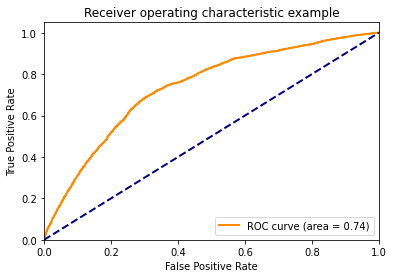

In [ ]:
# To paint the ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Calculate the ROC curve and the ROC area for each class.
fpr = dict()
tpr = dict()
roc_auc = dict()
# There are two classes since it is a binary classification problem.
n_classes = 2

# Calculate the True Positive Rate and the False Positive Rate.
fpr, tpr, _ = roc_curve(y_test, probab)
# Calculate the value of the "Area under the curve"
roc_auc = auc(fpr, tpr)

# The ROC curve is drawn.
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

You also get the following confusion matrix. 

> In this case, among the 13039 data you have classified, 9053 are correctly classified and 3986 are poorly classified.



Confusion matrix, without normalization
[[7706  816]
 [3170 1347]]


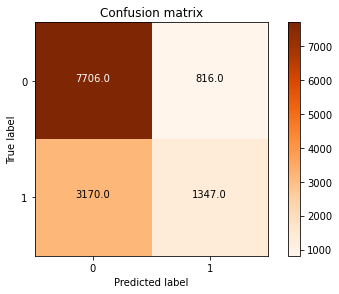

In [ ]:
# To paint the confusion matrix
from sklearn.metrics import confusion_matrix
# Itertools
import itertools

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks()).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=1) 
print('Confusion matrix, without normalization')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

For an entry "TF-IDF" a success rate of around 85% is obtained; however, for an entry "LDA" a success rate of approximately 69% is obtained.

> It is concluded that the classification with input "LDA" is not optimal since there are more errors when classifying than with input "TF-IDF"; therefore, for this project it is determined that better performance is obtained by making a classification with input the transformed "TF-IDF".

> The following graph shows the comparison of both *accuaracy*, seeing the difference in precision that is obtained with one against the other.


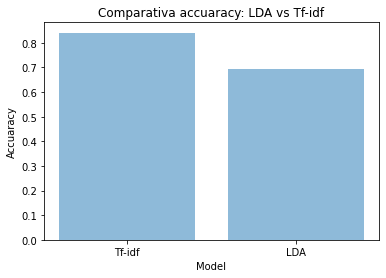

In [ ]:
x = ('Tf-idf','LDA')
y=(acc_tfidf, acc_lda)

plt.bar(x,y,align='center', alpha=0.5)
plt.ylabel('Accuaracy')
plt.xlabel('Model')
plt.title('Comparativa accuaracy: LDA vs Tf-idf')
 
plt.show()

#  **3. EXTENSION I**



In this part of the extension, we have studied the different topical models to compare their functionality and performance.  

> In the basic project, "LDA" was used in the topical modeling and through coherence the number of topics with which best coherence was obtained was determined.

> In this section two new topical models are represented: "LSI" and "HDP" and a comparison of the maximum value of coherence between the 3 topical models is made.


## **3.1. LSI "Latent Semantic Indexing" Model**




The "LSI" model uses sample documents to generate the basic terms for each category. To categorize them, the terms of the documents are compared with the terms of the example documents, making category assignments based on the similarity of the terms analyzed.

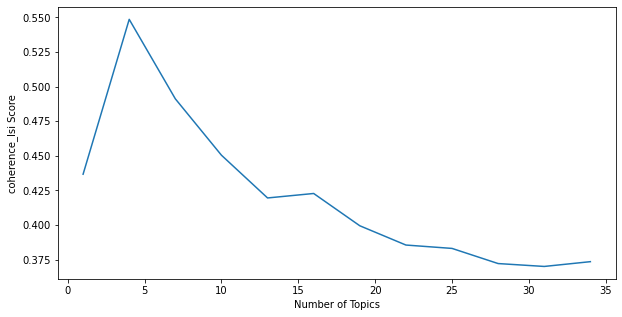

In [ ]:
from gensim.models import LsiModel
coherence_lsi = []

for nb_topics in range(1,36,3):
    lsi = LsiModel(corpus_BoW, num_topics = nb_topics, id2word = dictionary_BoW)
    cohm_lsi = CoherenceModel(model=lsi, texts=datos['corpus_clean'], dictionary=dictionary_BoW, coherence='c_v')
    coh_lsi = cohm_lsi.get_coherence()
    coherence_lsi.append(coh_lsi)

# visualize coherence_lsi
plt.figure(figsize=(10,5))
plt.plot(range(1,36,3),coherence_lsi)
plt.xlabel("Number of Topics") ##
plt.ylabel("coherence_lsi Score");

As can be seen in the chart above, the model acquires a greater coherence when its number of topics is 4, obtaining a coherence of 0.55.


In [ ]:
num_topics=0
max_coherence=0
for n in range(0,len(range(1,36,3))):
  if (coherence_lsi[n]>max_coherence):
    max_coherence = coherence_lsi[n]
    num_topics = n*3+1
print("Number of topics with greater coherence value = ", num_topics)
print("With a consistency of = ", max_coherence)

Numero de tópicos con mayor valor de coherencia =  4
Con una coherencia de =  0.5486531921876666


## **3.2. HDP "Hierarchical Dirichlet process" Model**



In this case, this model is based on an extension of the "LDA" model, generated for the case of not knowing the number of *topics* a priori. It is used to determine the amount of topics needed, as well as characterize their distributions.  

> The model in question has the advantage of having unlimited totes and being able to learn from the same data that is passed to it, without the need to establish it beforehand.  

> In this case, the function *HdpModel(corpus=corpus_BoW, id2word=dictionary_BoW)*, is used, and similarly, the coherence through the function *CoherenceModel()*, is analyzed later.



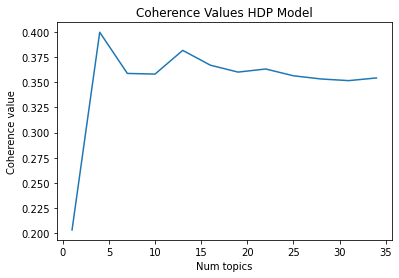

In [ ]:
from gensim.models import HdpModel
# We applied the HDP model
hdp = HdpModel(corpus=corpus_BoW, id2word=dictionary_BoW)

# We calculate the words of each topic that we will introduce in the model and the corresponding coherence values
hdp_list=[]
hdp_num_topics=list(range(1,36,3)) 
for i in hdp_num_topics:
    hdp_topics = []
    for topic_id, topic in hdp.show_topics(num_topics=i, formatted=False):
        topic = [word for word, _ in topic]
        hdp_topics.append(topic)
    
    coherence_model_hdp = CoherenceModel(topics=hdp_topics,texts=datos['corpus_clean'],corpus=corpus_BoW, dictionary=dictionary_BoW, coherence='c_v')
    coherence_hdp = coherence_model_hdp.get_coherence()
    hdp_list.append(coherence_hdp)



plt.ylabel('Coherence value')
plt.xlabel('Num topics')
plt.title('Coherence Values HDP Model')
plt.plot(hdp_num_topics,hdp_list)
plt.show()

As can be seen in the chart above, the model acquires a greater coherence when its number of topics is 4, obtaining a coherence equal to 0.40.

In [ ]:
num_topics=0
max_coherence=0
for n in range(0,len(range(1,36,3))):
  if (hdp_list[n]>max_coherence):
    max_coherence = hdp_list[n]
    num_topics = n*3+1
print("Number of topics with greater coherence value = ", num_topics)
print("With a coherence of = ", max_coherence)

Numero de tópicos con mayor valor de coherencia =  4
Con una coherencia de =  0.3996868073690373


## **3.3. Comparison between the models**



After implementing and calculating the different topic modeling systems: "LDA", "LSI" and "HDP", a comparative graph has been made between all of their maximum coherence values that they obtain.

> The graph is a histogram in which it is easily visualized which of all the models achieves greater coherence.  

> It can be seen how the "LDA" model achieves greater coherence with respect to the other two models. Although the maximum coherence of the "LSI" model is close to that of the "LDA". 

> Finally, it is concluded that with the topic model "LDA" have obtained better results compared to those that would be obtained with the rest of models for having a superior coherence.

In [ ]:
# This cell is uncomment according to the user manual.
"""coherence = []
for nb_topics in range(1,36,3):
    lda = LdaModel(corpus_BoW, num_topics = nb_topics, id2word = dictionary_BoW, passes=10,random_state=123)
    cohm = CoherenceModel(model=lda, texts=datos['corpus_clean'], dictionary=dictionary_BoW, coherence='c_v')
    coh = cohm.get_coherence()
    coherence.append(coh)

# The coherence is displayed for each number of topics used.
plt.figure(figsize=(10,5))
plt.plot(range(1,36,3),coherence)
plt.xlabel("Number of Topics") 
plt.ylabel("Coherence")"""

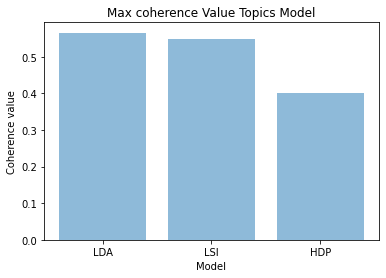

In [ ]:
x = ('LDA','LSI','HDP')
y=(max(coherence), max(coherence_lsi),max(hdp_list))

plt.bar(x,y,align='center', alpha=0.5)
plt.ylabel('Coherence value')
plt.xlabel('Model')
plt.title('Max coherence Value Topics Model')
 
plt.show()

#  **4. USER MANUAL**


The code is delivered in notebook version ". ipynb". As you can see, the code is structured in different sections and subheadings.

> The notebook is implemented in such a way that only with the sequential execution of each cell, functions and algorithms are executed, in addition to visualizing different data and graphs.

> In addition, it should be noted that the file ". csv" is automatically imported into the system, which is hosted in a google drive account. This makes it easy for any user, just by running each of the cells, to follow the code and get the results.

> Because you work with a lot of data, sometimes RAM gets saturated and disconnects from the programming environment. That is why, below are some steps of execution so that the saturation of the RAM and the disconnection with the environment does not occur.

> To execute to point 2.4: 
* First, run both the "Libraries" cell, and the "Import file ".csv" and Implemented Functions" cell. 
* After that, all the cells in the sections: 2.1, 2.2, 2.3 y 2.4., are executed.
* Finally, the programming environment is restarted.

> To execute point 2.5 "TF-IDF input":
* First, run both the "Libraries" cell, and the "Import file ".csv" and Implemented Functions" cell. 
* After that, all the cells in the sections: 2.1, 2.2 y 2.5."Input TF-IDF section", are executed.
* Finally, the programming environment is restarted.

> To execute point 2.5 "LDA input":
* First, run both the "Libraries" cell, and the "Import file ".csv" and Implemented Functions" cell. 
* After that, all the cells in the sections: 2.1, 2.2 y 2.5."Input LDA section" (uncomment the first cell that appears in that section), are executed.
* Finally, the programming environment is restarted.

> To execute point 3:
* First, run both the "Libraries" cell, and the "Import file ".csv" and Implemented Functions" cell. 
* After that, all the cells in the sections: 2.1, 2.2 y 3. (uncomment the fifth cell that appears in that section), are executed.
* Finally, the programming environment is restarted.








#  **5. REFERENCES**

1) For the code used to read the ".csv" files, the library "pandas" has been used, whose information has been obtained from the link:

https://pandas.pydata.org/

2) To edit the list of "stopwords", the information on the page has been used:

https://www.pythond.com/3359/agregando-palabras-a-la-lista-de-paradas-nltk.html

3) To perform the method of "modeling LDA topics" and adjust parameters has been used:

https://radimrehurek.com/gensim/models/ldamodel.html
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

4) To calculate all similarities between pairs of block documents by multiplying: sqrt(X)*sqrt(X)T.

https://numpy.org/doc/stable/reference/generated/numpy.matmul.html

5) To get a graph of the NumPy array: 

https://networkx.org/documentation/stable//reference/generated/networkx.convert_matrix.from_numpy_array.html

6) To get edge attributes from the Chart: 

https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_edge_attributes.html

7) To write the chart "G" obtained in "GraphML" format on the path:  

https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.readwrite.graphml.write_graphml.html

8) To determine the parameters for the "SVC" classifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://www.analyticslane.com/2018/07/02/gridsearchcv/#:~:text=GridSearchCV%20es%20una%20clase%20disponible,los%20segundos%20mediante%20validaci%C3%B3n%20cruzada.

https://www.analyticslane.com/2019/02/18/seleccionar-automaticamente-los-modelos-en-python-con-gridsearchcv/

9) To perform the "TF-IDF" transformation.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

https://towardsdatascience.com/tf-idf-explained-and-python-sklearn-implementation-b020c5e83275

10) To perform the "SVC" classifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

11) To paint the ROC curve and calculate the area under the curve: 
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

12) To paint the confusion matrix:

https://stackoverflow.com/questions/40264763/how-can-i-make-my-confusion-matrix-plot-only-1-decimal-in-python

13) To paint histogram:

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html


14) To perform the "LSI" Topic Modeling method:

https://radimrehurek.com/gensim/models/lsimodel.html

15) To perform the "HDP" Topic Modeling method:

https://radimrehurek.com/gensim/models/hdpmodel.html
